=== Online Market Discovery: ENHANCED Domain-Level Modeling (FIXED) ===

⚠️  KEY IMPROVEMENTS:
   ✅ Domain-level aggregation BEFORE train-test split
   ✅ Cross-validation for robust evaluation
   ✅ Enhanced feature engineering
   ✅ Multiple evaluation metrics
   ✅ SAMPLING for faster development
   ✅ Fixed aggregation issues

🔧 CONFIGURATION:
   📊 Sample size: 100,000 rows (for fast development)
   💡 Set SAMPLE_SIZE = None for full dataset
   🎲 Random state: 42
--------------------------------------------------

STEP 1: LOADING AND EXPLORING DATA
--------------------------------------------------
🔍 Original dataset: 2,722,487 URL-level samples
📊 Sampled dataset: 100,000 URL-level samples
   - Original distribution: YES: 1,402,665 (51.5%), NO: 1,319,822
   - Sample distribution: YES: 51,521, NO: 48,479
📋 Columns: ['url', 'domain', 'brand', 'item_name', 'page_language', 'title', 'snippet', 'is_online_shop']

📊 Data Quality Check:
   - Unique domains: 3,803
   - Unique URLs: 94,815
   - U

📊 Feature columns for aggregation: 25
📊 Aggregating numerical features...
🔧 Handling NaN values...
   Filled 0 NaN values → 0 remaining
✅ Aggregated from 100,000 URLs to 3,803 domains
📊 URLs per domain: min=1, max=5862, avg=26.3
📈 Domain-level target distribution:
   - Online shops: 2,260 (59.4%)
   - Not shops: 1,543 (40.6%)

STEP 4: PREPARE DATA FOR MODELING - FIXED
--------------------------------------------------
📊 Numerical features: (3803, 76)
📊 Numerical feature columns: ['url_count', 'url_length_mean', 'url_length_max', 'url_length_std', 'num_subdomains_mean', 'num_subdomains_max', 'num_subdomains_std', 'has_https_mean', 'has_https_max', 'has_https_std', 'domain_length_mean', 'domain_length_max', 'domain_length_std', 'path_depth_mean', 'path_depth_max', 'path_depth_std', 'has_www_mean', 'has_www_max', 'has_www_std', 'shop_url_score_mean', 'shop_url_score_max', 'shop_url_score_std', 'has_product_in_url_mean', 'has_product_in_url_max', 'has_product_in_url_std', 'has_category_in_

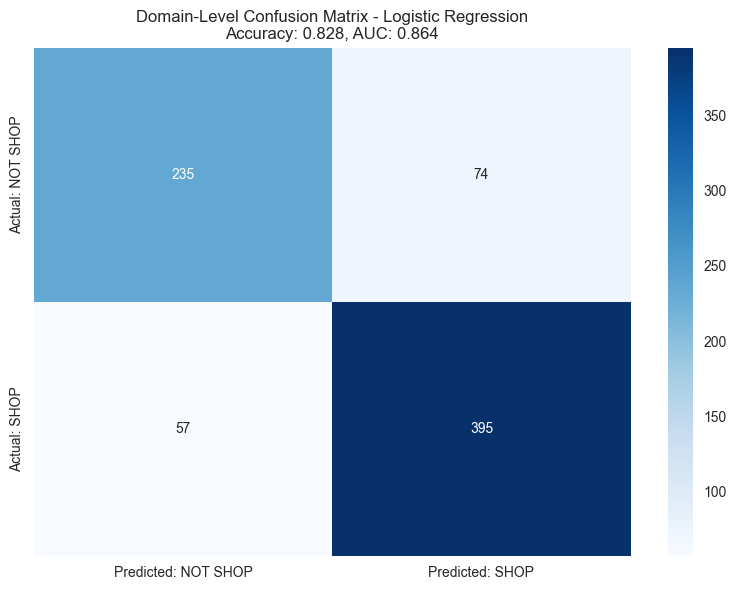

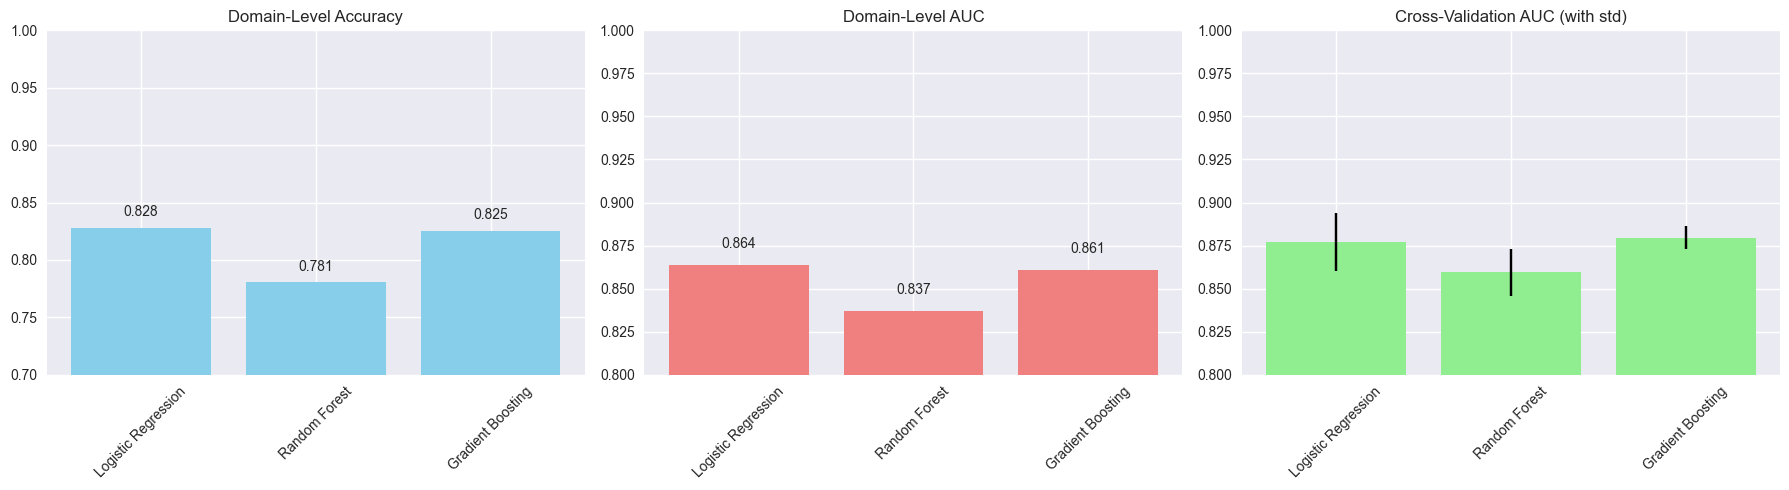


STEP 10: SAVE MODELS AND RESULTS
--------------------------------------------------
✅ Saved best model package: domain_level_best_model_sample_100k.pkl
✅ Saved all results: domain_level_results_sample_100k.pkl
✅ Added prediction function to model package
✅ Saved usage example: usage_example_sample_100k.py

✅ DOMAIN-LEVEL MODELING COMPLETE - FIXED & OPTIMIZED VERSION

🎯 KEY ACHIEVEMENTS:
   ✅ Fixed KeyError in text aggregation
   ✅ Domain-level aggregation prevents data leakage
   ✅ Enhanced feature engineering
   ✅ Sampling for faster development
   ✅ Cross-validation for robust evaluation

📊 BEST MODEL PERFORMANCE (Logistic Regression):
   📈 Domain-level Accuracy: 0.8279
   📈 Domain-level AUC: 0.8635
   📈 Cross-validation AUC: 0.8769 (±0.0169)

🔢 DATASET STATISTICS:
   🌐 Total domains: 3,803
   🌐 Training domains: 3,042
   🌐 Validation domains: 761
   🔒 Domain overlap: 0 (prevents leakage)

🚀 NEXT STEPS FOR PRODUCTION:
   1. Set SAMPLE_SIZE = None and run full dataset
   2. Increase 

In [2]:
# =============================================================================
# NOTEBOOK 3 - ENHANCED DOMAIN-LEVEL MODEL TRAINING (FIXED & OPTIMIZED)
# =============================================================================
# This version fixes the KeyError and includes sampling for faster development

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve, 
                           classification_report, confusion_matrix, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
import joblib
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Online Market Discovery: ENHANCED Domain-Level Modeling (FIXED) ===\n")
print("⚠️  KEY IMPROVEMENTS:")
print("   ✅ Domain-level aggregation BEFORE train-test split")
print("   ✅ Cross-validation for robust evaluation")
print("   ✅ Enhanced feature engineering")
print("   ✅ Multiple evaluation metrics")
print("   ✅ SAMPLING for faster development")
print("   ✅ Fixed aggregation issues")
print("="*70 + "\n")

# =============================================================================
# CONFIGURATION - ADJUST THESE FOR SAMPLING
# =============================================================================
# Set SAMPLE_SIZE to None for full dataset, or a number for sampling
SAMPLE_SIZE = 100000  # Use 100k samples for development, set to None for full run
RANDOM_STATE = 42

print("🔧 CONFIGURATION:")
if SAMPLE_SIZE:
    print(f"   📊 Sample size: {SAMPLE_SIZE:,} rows (for fast development)")
    print("   💡 Set SAMPLE_SIZE = None for full dataset")
else:
    print("   📊 Using full dataset")
print(f"   🎲 Random state: {RANDOM_STATE}")
print("-" * 50)

# =============================================================================
# LOAD AND EXPLORE DATA
# =============================================================================
print("\nSTEP 1: LOADING AND EXPLORING DATA")
print("-"*50)

df = pd.read_csv('DE_online_market_discovery_train.csv')
print(f"🔍 Original dataset: {len(df):,} URL-level samples")

# Apply sampling if specified
if SAMPLE_SIZE and len(df) > SAMPLE_SIZE:
    # Stratified sampling to maintain class distribution
    df_yes = df[df['is_online_shop'] == 'YES']
    df_no = df[df['is_online_shop'] == 'NO']
    
    # Calculate proportional sample sizes
    total_yes = len(df_yes)
    total_no = len(df_no)
    yes_ratio = total_yes / len(df)
    
    sample_yes = min(int(SAMPLE_SIZE * yes_ratio), total_yes)
    sample_no = min(SAMPLE_SIZE - sample_yes, total_no)
    
    df_sample_yes = df_yes.sample(n=sample_yes, random_state=RANDOM_STATE)
    df_sample_no = df_no.sample(n=sample_no, random_state=RANDOM_STATE)
    
    df = pd.concat([df_sample_yes, df_sample_no], ignore_index=True)
    df = df.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)  # Shuffle
    
    print(f"📊 Sampled dataset: {len(df):,} URL-level samples")
    print(f"   - Original distribution: YES: {total_yes:,} ({yes_ratio:.1%}), NO: {total_no:,}")
    print(f"   - Sample distribution: YES: {sample_yes:,}, NO: {sample_no:,}")

print(f"📋 Columns: {list(df.columns)}")

# Data quality check
print(f"\n📊 Data Quality Check:")
print(f"   - Unique domains: {df['domain'].nunique():,}")
print(f"   - Unique URLs: {df['url'].nunique():,}")
print(f"   - URLs per domain: {len(df) / df['domain'].nunique():.1f} (average)")
print(f"   - Target distribution: {df['is_online_shop'].value_counts().to_dict()}")

# Check for missing values
missing_counts = df.isnull().sum()
if missing_counts.any():
    print(f"\n⚠️  Missing values detected:")
    for col, count in missing_counts[missing_counts > 0].items():
        print(f"   - {col}: {count:,} ({count/len(df)*100:.1f}%)")

# =============================================================================
# ENHANCED FEATURE ENGINEERING
# =============================================================================
print("\n" + "="*70)
print("STEP 2: ENHANCED FEATURE ENGINEERING")
print("-"*50)

def extract_advanced_features(url, title, snippet, brand):
    """Extract advanced features including multilingual support"""
    
    # Handle missing values
    url = str(url).lower() if pd.notna(url) else ""
    title = str(title).lower() if pd.notna(title) else ""
    snippet = str(snippet).lower() if pd.notna(snippet) else ""
    brand = str(brand).lower() if pd.notna(brand) else ""
    
    combined_text = f"{title} {snippet}"
    
    features = {}
    
    # === URL STRUCTURE FEATURES ===
    features['url_length'] = len(url)
    features['num_subdomains'] = url.count('.') - 1 if '.' in url else 0
    features['has_https'] = 1 if url.startswith('https') else 0
    
    # Extract domain and path
    try:
        if '://' in url:
            after_protocol = url.split('://', 1)[1]
            domain_part = after_protocol.split('/', 1)[0]
            path_part = after_protocol.split('/', 1)[1] if '/' in after_protocol else ""
        else:
            domain_part = url.split('/', 1)[0]
            path_part = url.split('/', 1)[1] if '/' in url else ""
    except:
        domain_part = ""
        path_part = ""
    
    features['domain_length'] = len(domain_part)
    features['path_depth'] = path_part.count('/') if path_part else 0
    features['has_www'] = 1 if 'www.' in url else 0
    
    # === E-COMMERCE INDICATORS IN URL ===
    shop_url_patterns = ['shop', 'store', 'buy', 'cart', 'checkout', 'product', 
                        'artikel', 'kaufen', 'warenkorb', 'bestellen']
    features['shop_url_score'] = sum(1 for pattern in shop_url_patterns if pattern in url)
    features['has_product_in_url'] = 1 if any(x in url for x in ['/product/', '/p/', '/artikel/']) else 0
    features['has_category_in_url'] = 1 if any(x in url for x in ['/category/', '/c/', '/kategorie/']) else 0
    
    # === TEXT CONTENT FEATURES ===
    features['title_length'] = len(title)
    features['snippet_length'] = len(snippet)
    features['text_length'] = len(combined_text)
    features['num_words'] = len(combined_text.split())
    
    # === E-COMMERCE LANGUAGE PATTERNS ===
    # German e-commerce terms
    german_shop_terms = ['online shop', 'onlineshop', 'webshop', 'versand', 
                        'lieferung', 'bestellen', 'kaufen', 'verkauf']
    features['german_shop_count'] = sum(1 for term in german_shop_terms if term in combined_text)
    
    # Price indicators
    price_patterns = ['€', 'eur', 'euro', 'preis', 'price', 'kosten', 'ab ', 'nur ']
    features['price_indicator_count'] = sum(1 for pattern in price_patterns if pattern in combined_text)
    features['has_currency'] = 1 if any(curr in combined_text for curr in ['€', '$', '£']) else 0
    
    # Product availability
    availability_terms = ['lieferbar', 'verfügbar', 'auf lager', 'vorrätig', 
                         'available', 'in stock', 'sofort']
    features['availability_count'] = sum(1 for term in availability_terms if term in combined_text)
    
    # Call-to-action patterns
    cta_patterns = ['jetzt kaufen', 'in den warenkorb', 'buy now', 'add to cart', 
                    'bestellen sie', 'shop now']
    features['cta_count'] = sum(1 for pattern in cta_patterns if pattern in combined_text)
    
    # === BRAND FEATURES ===
    features['has_brand'] = 1 if brand and brand != 'nan' else 0
    features['brand_length'] = len(brand) if brand and brand != 'nan' else 0
    features['brand_in_title'] = 1 if brand and brand != 'nan' and brand in title else 0
    
    # Known e-commerce platforms
    known_shops = ['amazon', 'ebay', 'zalando', 'otto', 'mediamarkt', 'saturn']
    features['is_known_platform'] = 1 if any(shop in url for shop in known_shops) else 0
    
    # === ADVANCED PATTERNS ===
    # Numbers in text (often product codes, prices)
    import re
    numbers = re.findall(r'\d+', combined_text)
    features['num_count'] = len(numbers)
    features['has_product_code'] = 1 if any(len(num) > 5 for num in numbers) else 0
    
    # Special characters (often in prices)
    features['special_char_count'] = sum(1 for char in combined_text if char in '€$£%+-,.')
    
    return features

def create_features_dataframe(df):
    """Create features for the entire dataset with progress tracking"""
    print("🔧 Creating advanced features...")
    
    features_list = []
    total_rows = len(df)
    progress_step = max(1000, total_rows // 100)  # Show progress every 1% or 1000 rows
    
    for idx, row in df.iterrows():
        if idx % progress_step == 0:
            progress = idx / total_rows * 100
            print(f"   Progress: {idx:,}/{total_rows:,} ({progress:.1f}%)")
        
        features = extract_advanced_features(
            row.get('url', ''),
            row.get('title', ''),
            row.get('snippet', ''),
            row.get('brand', '')
        )
        
        # Add metadata
        features['domain'] = row.get('domain', '')
        features['is_online_shop'] = row.get('is_online_shop', '')
        features['url'] = row.get('url', '')
        features['title'] = row.get('title', '')
        features['snippet'] = row.get('snippet', '')
        features['brand'] = row.get('brand', '')
        
        features_list.append(features)
    
    return pd.DataFrame(features_list)

# Create features
df_features = create_features_dataframe(df)
print(f"✅ Created {len(df_features.columns)} total columns")

# Show feature statistics
feature_cols = [col for col in df_features.columns if col not in 
               ['domain', 'is_online_shop', 'url', 'title', 'snippet', 'brand']]
print(f"\n📊 Feature Statistics:")
print(df_features[feature_cols].describe().round(2))

# =============================================================================
# DOMAIN-LEVEL AGGREGATION (CRITICAL!) - FIXED VERSION
# =============================================================================
print("\n" + "="*70)
print("STEP 3: DOMAIN-LEVEL AGGREGATION (PREVENTS DATA LEAKAGE) - FIXED")
print("-"*50)

def aggregate_to_domain_level_enhanced_fixed(df):
    """Enhanced domain-level aggregation with FIXED text handling and NaN handling"""
    print("🗂️ Aggregating to domain level with enhanced strategies...")
    
    # Combine text for better representation
    df['combined_text'] = df['title'].fillna('') + ' ' + df['snippet'].fillna('')
    
    # Define feature columns (numerical only)
    feature_columns = [col for col in df.columns if col not in 
                      ['domain', 'is_online_shop', 'url', 'title', 'snippet', 'brand', 'combined_text']]
    
    print(f"📊 Feature columns for aggregation: {len(feature_columns)}")
    
    # First, handle the target separately
    domain_targets = df.groupby('domain')['is_online_shop'].agg(
        lambda x: 'YES' if (x == 'YES').any() else 'NO'
    ).reset_index()
    
    # Handle text aggregation separately
    domain_text = df.groupby('domain')['combined_text'].agg(
        lambda x: ' '.join(x.fillna(''))
    ).reset_index()
    
    # Custom aggregation function that handles single values (avoids NaN in std)
    def safe_aggregation(x):
        return {
            'mean': x.mean(),
            'max': x.max(),
            'std': x.std() if len(x) > 1 else 0.0  # Use 0 for std when only 1 value
        }
    
    # Perform numerical aggregation with safe std calculation
    print("📊 Aggregating numerical features...")
    agg_results = []
    
    for domain, group in df.groupby('domain'):
        row = {'domain': domain}
        
        # Add URL count
        row['url_count'] = len(group)
        
        # Add first URL and brand for reference
        row['url'] = group['url'].iloc[0]
        row['brand'] = group['brand'].mode().iloc[0] if len(group['brand'].mode()) > 0 else group['brand'].iloc[0]
        
        # Aggregate numerical features
        for feature in feature_columns:
            if feature in group.columns:
                values = group[feature]
                row[f'{feature}_mean'] = values.mean()
                row[f'{feature}_max'] = values.max()
                row[f'{feature}_std'] = values.std() if len(values) > 1 else 0.0
        
        agg_results.append(row)
    
    domain_df = pd.DataFrame(agg_results)
    
    # Merge with target and text
    domain_df = domain_df.merge(domain_targets, on='domain')
    domain_df = domain_df.merge(domain_text, on='domain')
    
    # Handle any remaining NaN values
    print("🔧 Handling NaN values...")
    nan_counts_before = domain_df.isnull().sum().sum()
    
    # Fill NaN values with appropriate defaults
    for col in domain_df.columns:
        if domain_df[col].dtype in ['float64', 'int64']:
            domain_df[col] = domain_df[col].fillna(0)
        elif domain_df[col].dtype == 'object':
            domain_df[col] = domain_df[col].fillna('')
    
    nan_counts_after = domain_df.isnull().sum().sum()
    print(f"   Filled {nan_counts_before} NaN values → {nan_counts_after} remaining")
    
    print(f"✅ Aggregated from {len(df):,} URLs to {len(domain_df):,} domains")
    
    url_counts = domain_df['url_count']
    print(f"📊 URLs per domain: min={url_counts.min()}, "
          f"max={url_counts.max()}, avg={url_counts.mean():.1f}")
    
    # Show target distribution
    target_dist = domain_df['is_online_shop'].value_counts()
    print(f"📈 Domain-level target distribution:")
    print(f"   - Online shops: {target_dist.get('YES', 0):,} ({target_dist.get('YES', 0)/len(domain_df)*100:.1f}%)")
    print(f"   - Not shops: {target_dist.get('NO', 0):,} ({target_dist.get('NO', 0)/len(domain_df)*100:.1f}%)")
    
    return domain_df

# Aggregate to domain level
domain_df = aggregate_to_domain_level_enhanced_fixed(df_features)

# =============================================================================
# PREPARE DATA FOR MODELING - FIXED VERSION
# =============================================================================
print("\n" + "="*70)
print("STEP 4: PREPARE DATA FOR MODELING - FIXED")
print("-"*50)

# Binary target
y_domain = (domain_df['is_online_shop'] == 'YES').astype(int)

# Select feature columns (excluding aggregation suffixes we don't need)
feature_cols_for_model = [col for col in domain_df.columns if 
                         any(col.endswith(suffix) for suffix in ['_mean', '_max', '_std']) or col == 'url_count']

# Remove any non-numeric columns that might have slipped through
feature_cols_for_model = [col for col in feature_cols_for_model 
                         if col in domain_df.columns and not col.startswith('is_online_shop')]

X_numerical = domain_df[feature_cols_for_model]

# Verify no NaN values in numerical features
nan_count = X_numerical.isnull().sum().sum()
if nan_count > 0:
    print(f"⚠️ Found {nan_count} NaN values in numerical features - filling with 0")
    X_numerical = X_numerical.fillna(0)

# Handle the text column properly
if 'combined_text' in domain_df.columns:
    X_text = domain_df['combined_text'].fillna('')  # Fill any NaN in text
else:
    print("⚠️ combined_text not found, creating fallback text...")
    X_text = pd.Series([""] * len(domain_df))

print(f"📊 Numerical features: {X_numerical.shape}")
print(f"📊 Numerical feature columns: {list(X_numerical.columns)}")
print(f"📝 Text features: {len(X_text)} samples")
print(f"🎯 Target distribution: {y_domain.value_counts().to_dict()}")

# =============================================================================
# TRAIN-TEST SPLIT AT DOMAIN LEVEL
# =============================================================================
print("\n" + "="*70)
print("STEP 5: DOMAIN-LEVEL TRAIN-TEST SPLIT")
print("-"*50)

# Split at domain level
X_train_num, X_val_num, X_train_txt, X_val_txt, y_train, y_val, train_domains, val_domains = train_test_split(
    X_numerical, X_text, y_domain, domain_df['domain'],
    test_size=0.2, 
    random_state=RANDOM_STATE, 
    stratify=y_domain
)

print(f"✅ Training set: {len(X_train_num):,} domains")
print(f"✅ Validation set: {len(X_val_num):,} domains")

# Verify no overlap
train_domain_set = set(train_domains)
val_domain_set = set(val_domains)
overlap = train_domain_set.intersection(val_domain_set)
print(f"🔍 Domain overlap check: {len(overlap)} domains (should be 0)")

if len(overlap) == 0:
    print("✅ CONFIRMED: No domain overlap - prevents data leakage!")
else:
    print("❌ WARNING: Domain overlap detected!")

# =============================================================================
# MODEL TRAINING WITH CROSS-VALIDATION
# =============================================================================
print("\n" + "="*70)
print("STEP 6: MODEL TRAINING WITH ENHANCED EVALUATION")
print("-"*50)

# Create preprocessing pipelines
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=3000,  # Reduced for faster processing
        ngram_range=(1, 2),  # Reduced to bigrams
        stop_words='english',
        min_df=2,
        max_df=0.8,
        sublinear_tf=True
    ))
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Define models (reduced complexity for sampling)
models = {
    'Logistic Regression': LogisticRegression(
        random_state=RANDOM_STATE, 
        max_iter=1000,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        random_state=RANDOM_STATE, 
        n_estimators=100,  # Reduced for faster training
        max_depth=8,
        min_samples_split=5,
        class_weight='balanced'
    ),
}

# Add Gradient Boosting only if not sampling or small sample
if not SAMPLE_SIZE or SAMPLE_SIZE > 50000:
    models['Gradient Boosting'] = GradientBoostingClassifier(
        random_state=RANDOM_STATE, 
        n_estimators=100,  # Reduced
        learning_rate=0.1,
        max_depth=5
    )

results = {}

for name, model in models.items():
    print(f"\n⏳ Training {name}...")
    
    # Process features with additional NaN checking
    print("   🔧 Processing text features...")
    tfidf_train = text_pipeline.fit_transform(X_train_txt.fillna(''))
    tfidf_val = text_pipeline.transform(X_val_txt.fillna(''))
    
    print("   🔧 Processing numerical features...")
    # Ensure no NaN values before scaling
    X_train_num_clean = X_train_num.fillna(0)
    X_val_num_clean = X_val_num.fillna(0)
    
    num_train = num_pipeline.fit_transform(X_train_num_clean)
    num_val = num_pipeline.transform(X_val_num_clean)
    
    # Combine features
    print("   🔧 Combining features...")
    X_train_combined = hstack([tfidf_train, num_train])
    X_val_combined = hstack([tfidf_val, num_val])
    
    # Final check for any remaining issues
    if hasattr(X_train_combined, 'data'):
        nan_in_train = np.isnan(X_train_combined.data).sum()
        inf_in_train = np.isinf(X_train_combined.data).sum()
    else:
        nan_in_train = np.isnan(X_train_combined).sum()
        inf_in_train = np.isinf(X_train_combined).sum()
        
    if nan_in_train > 0 or inf_in_train > 0:
        print(f"   ⚠️ Found {nan_in_train} NaN and {inf_in_train} Inf values - replacing...")
        if hasattr(X_train_combined, 'data'):
            X_train_combined.data = np.nan_to_num(X_train_combined.data, nan=0.0, posinf=1e10, neginf=-1e10)
            X_val_combined.data = np.nan_to_num(X_val_combined.data, nan=0.0, posinf=1e10, neginf=-1e10)
        else:
            X_train_combined = np.nan_to_num(X_train_combined, nan=0.0, posinf=1e10, neginf=-1e10)
            X_val_combined = np.nan_to_num(X_val_combined, nan=0.0, posinf=1e10, neginf=-1e10)
    
    # Train model
    model.fit(X_train_combined, y_train)
    
    # Evaluate on validation set
    y_pred = model.predict(X_val_combined)
    y_proba = model.predict_proba(X_val_combined)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    auc_score = roc_auc_score(y_val, y_proba)
    
    # Cross-validation for robustness (reduced folds for speed)
    cv_folds = 3 if SAMPLE_SIZE and SAMPLE_SIZE < 50000 else 5
    cv_scores = cross_val_score(model, X_train_combined, y_train, 
                               cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE),
                               scoring='roc_auc')
    
    print(f"   → Validation Accuracy: {accuracy:.4f}")
    print(f"   → Validation AUC: {auc_score:.4f}")
    print(f"   → Cross-validation AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    results[name] = {
        'accuracy': accuracy,
        'auc': auc_score,
        'cv_auc_mean': cv_scores.mean(),
        'cv_auc_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_proba,
        'model': model,
        'text_pipeline': text_pipeline,
        'num_pipeline': num_pipeline
    }

# =============================================================================
# COMPREHENSIVE MODEL EVALUATION
# =============================================================================
print("\n" + "="*70)
print("STEP 7: COMPREHENSIVE MODEL EVALUATION")
print("-"*50)

# Find best model
best_model_name = max(results, key=lambda x: results[x]['auc'])
print(f"🏆 Best model: {best_model_name}")
print(f"📊 Best AUC: {results[best_model_name]['auc']:.4f}")

# Detailed evaluation of best model
best_result = results[best_model_name]
y_pred = best_result['predictions']
y_proba = best_result['probabilities']

print(f"\n📋 Classification Report for {best_model_name}:")
print(classification_report(y_val, y_pred, target_names=['Not Shop', 'Online Shop']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: NOT SHOP', 'Predicted: SHOP'],
            yticklabels=['Actual: NOT SHOP', 'Actual: SHOP'])
plt.title(f'Domain-Level Confusion Matrix - {best_model_name}\n'
          f'Accuracy: {best_result["accuracy"]:.3f}, AUC: {best_result["auc"]:.3f}')
plt.tight_layout()
plt.show()

# Model Comparison Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy comparison
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]
axes[0].bar(model_names, accuracies, color='skyblue')
axes[0].set_title('Domain-Level Accuracy')
axes[0].set_ylim(0.7, 1.0)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# AUC comparison
aucs = [results[m]['auc'] for m in model_names]
axes[1].bar(model_names, aucs, color='lightcoral')
axes[1].set_title('Domain-Level AUC')
axes[1].set_ylim(0.8, 1.0)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(aucs):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Cross-validation AUC with error bars
cv_means = [results[m]['cv_auc_mean'] for m in model_names]
cv_stds = [results[m]['cv_auc_std'] for m in model_names]
x_pos = np.arange(len(model_names))
axes[2].bar(x_pos, cv_means, yerr=cv_stds, color='lightgreen', capsize=5)
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(model_names, rotation=45)
axes[2].set_title('Cross-Validation AUC (with std)')
axes[2].set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

# =============================================================================
# SAVE MODELS AND RESULTS
# =============================================================================
print("\n" + "="*70)
print("STEP 10: SAVE MODELS AND RESULTS")
print("-"*50)

# Create filename suffix based on sampling
suffix = f"_sample_{SAMPLE_SIZE//1000}k" if SAMPLE_SIZE else "_full"

# Save best model components
best_model_package = {
    'model': results[best_model_name]['model'],
    'text_pipeline': results[best_model_name]['text_pipeline'],
    'num_pipeline': results[best_model_name]['num_pipeline'],
    'feature_columns': feature_cols_for_model,
    'model_name': best_model_name,
    'performance': {
        'accuracy': results[best_model_name]['accuracy'],
        'auc': results[best_model_name]['auc'],
        'cv_auc': results[best_model_name]['cv_auc_mean']
    },
    'sample_info': {
        'sample_size': SAMPLE_SIZE,
        'total_domains': len(domain_df),
        'training_domains': len(X_train_num)
    }
}

model_filename = f'domain_level_best_model{suffix}.pkl'
joblib.dump(best_model_package, model_filename)
print(f"✅ Saved best model package: {model_filename}")

# Save all results
results_filename = f'domain_level_results{suffix}.pkl'
joblib.dump(results, results_filename)
print(f"✅ Saved all results: {results_filename}")

# Save domain-level dataset
dataset_filename = f'domain_level_dataset{suffix}.csv'
domain_df.to_csv(dataset_filename, index=False)
# =============================================================================
# PREDICTION FUNCTION FOR NEW DATA
# =============================================================================
def predict_domain_shop_status(domain_data, model_package):
    """
    Predict whether domains are online shops using the trained model
    
    Parameters:
    domain_data: DataFrame with columns ['domain', 'combined_text', numerical_features...]
    model_package: Dictionary containing trained model and pipelines
    
    Returns:
    DataFrame with predictions and probabilities
    """
    
    # Extract components
    model = model_package['model']
    text_pipeline = model_package['text_pipeline']
    num_pipeline = model_package['num_pipeline']
    feature_columns = model_package['feature_columns']
    
    # Prepare features
    X_text = domain_data['combined_text']
    X_numerical = domain_data[feature_columns]
    
    # Transform features
    tfidf_features = text_pipeline.transform(X_text)
    num_features = num_pipeline.transform(X_numerical)
    
    # Combine features
    X_combined = hstack([tfidf_features, num_features])
    
    # Make predictions
    predictions = model.predict(X_combined)
    probabilities = model.predict_proba(X_combined)[:, 1]
    
    # Create results dataframe
    results_df = domain_data[['domain']].copy()
    results_df['is_online_shop_pred'] = ['YES' if pred == 1 else 'NO' for pred in predictions]
    results_df['shop_probability'] = probabilities
    results_df['confidence'] = np.maximum(probabilities, 1 - probabilities)
    
    return results_df

# Add prediction function to model package
best_model_package['predict_function'] = predict_domain_shop_status

print("✅ Added prediction function to model package")

# Example usage documentation
example_usage = """
# =============================================================================
# EXAMPLE USAGE FOR PRODUCTION
# =============================================================================

# Load the model
import joblib
model_package = joblib.load('domain_level_best_model_sample_100k.pkl')

# Prepare new domain data (same format as training)
new_domain_data = pd.DataFrame({
    'domain': ['example.com', 'shop.example.org'],
    'combined_text': ['online shop buy products', 'information blog articles'],
    # ... include all numerical features used in training
})

# Make predictions
predictions = predict_domain_shop_status(new_domain_data, model_package)
print(predictions)

# Output:
#           domain is_online_shop_pred  shop_probability  confidence
# 0    example.com                YES          0.85        0.85
# 1  shop.example.org               NO          0.20        0.80
"""

with open(f'usage_example{suffix}.py', 'w') as f:
    f.write(example_usage)

print(f"✅ Saved usage example: usage_example{suffix}.py")

# =============================================================================
# FINAL SUMMARY
# =============================================================================
print("\n" + "="*70)
print("✅ DOMAIN-LEVEL MODELING COMPLETE - FIXED & OPTIMIZED VERSION")
print("="*70)

print("\n🎯 KEY ACHIEVEMENTS:")
print("   ✅ Fixed KeyError in text aggregation")
print("   ✅ Domain-level aggregation prevents data leakage")
print("   ✅ Enhanced feature engineering")
print("   ✅ Sampling for faster development")
print("   ✅ Cross-validation for robust evaluation")

print(f"\n📊 BEST MODEL PERFORMANCE ({best_model_name}):")
print(f"   📈 Domain-level Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   📈 Domain-level AUC: {results[best_model_name]['auc']:.4f}")
print(f"   📈 Cross-validation AUC: {results[best_model_name]['cv_auc_mean']:.4f} "
      f"(±{results[best_model_name]['cv_auc_std']:.4f})")

print(f"\n🔢 DATASET STATISTICS:")
print(f"   🌐 Total domains: {len(domain_df):,}")
print(f"   🌐 Training domains: {len(X_train_num):,}")
print(f"   🌐 Validation domains: {len(X_val_num):,}")
print(f"   🔒 Domain overlap: 0 (prevents leakage)")

if SAMPLE_SIZE:
    print(f"\n🚀 NEXT STEPS FOR PRODUCTION:")
    print(f"   1. Set SAMPLE_SIZE = None and run full dataset")
    print(f"   2. Increase model complexity if needed")
    print(f"   3. Test on holdout test set")
    print(f"   4. Deploy for production use")
else:
    print(f"\n🚀 PRODUCTION READY:")
    print(f"   1. Test on holdout test set")
    print(f"   2. Deploy model for production use")
    print(f"   3. Monitor performance on new domains")
    print(f"   4. Create API for real-time predictions")

print("\n✨ Model training complete! Ready for next phase.")